## Research Plan
Test differen netowork topology
1. Set up and import AB graph,  networkX objects []
2. set up and test fb socialgraph 
3. Set up and test twittwe social graph 

Test 
1. Test information passing
2. Test different agent behavior?

In [1]:
import AB_model as ab 
import networkx as nx

In [2]:
model = ab.InfoSpread (num_nodes=1000, new_edge_num=3, initial_outbreak_size=1, threshold = 2, inf_prob = 0.5)
#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
for i in range(50):
    model.step()

In [3]:
df = model.datacollector.get_model_vars_dataframe()
df

,Infected,Susceptible
0,5,995
1,7,993
2,9,991
3,14,986
4,23,977
5,41,959
6,92,908
7,196,804
8,385,615
9,572,428


In [4]:
(nx.average_clustering(model.G),
nx.average_shortest_path_length(model.G),
model.G.degree())

(0.025305926385977888,
 3.5264644644644645,
 DegreeView({0: 26, 1: 28, 2: 36, 3: 92, 4: 58, 5: 47, 6: 55, 7: 35, 8: 57, 9: 37, 10: 39, 11: 17, 12: 14, 13: 11, 14: 43, 15: 28, 16: 8, 17: 26, 18: 61, 19: 23, 20: 33, 21: 20, 22: 23, 23: 24, 24: 21, 25: 18, 26: 38, 27: 11, 28: 13, 29: 21, 30: 16, 31: 9, 32: 36, 33: 24, 34: 18, 35: 6, 36: 9, 37: 5, 38: 14, 39: 16, 40: 26, 41: 20, 42: 10, 43: 20, 44: 15, 45: 11, 46: 26, 47: 11, 48: 23, 49: 17, 50: 33, 51: 16, 52: 25, 53: 8, 54: 11, 55: 14, 56: 15, 57: 15, 58: 4, 59: 6, 60: 12, 61: 4, 62: 14, 63: 7, 64: 23, 65: 10, 66: 4, 67: 14, 68: 15, 69: 13, 70: 9, 71: 4, 72: 6, 73: 17, 74: 6, 75: 13, 76: 7, 77: 13, 78: 16, 79: 9, 80: 14, 81: 11, 82: 21, 83: 13, 84: 6, 85: 11, 86: 19, 87: 8, 88: 11, 89: 14, 90: 18, 91: 11, 92: 15, 93: 10, 94: 5, 95: 7, 96: 6, 97: 7, 98: 4, 99: 6, 100: 12, 101: 17, 102: 7, 103: 8, 104: 9, 105: 11, 106: 7, 107: 11, 108: 9, 109: 8, 110: 6, 111: 12, 112: 6, 113: 7, 114: 7, 115: 3, 116: 7, 117: 10, 118: 12, 119: 5, 120: 3, 121

## batchrun

In [10]:
from mesa.batchrunner import BatchRunner
from AB_model import *

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
# rewire_list = []
# for i in range(21):
#     rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]
new_edge_num_list = range(1,20)

fixed_params = {"num_nodes": 1000,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               "inf_prob" : 1,
               }
variable_params = {"new_edge_num": new_edge_num_list}  
batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=10,
                        max_steps=50,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

190it [01:30,  2.10it/s]


In [11]:
run_data = batch_run.get_model_vars_dataframe()

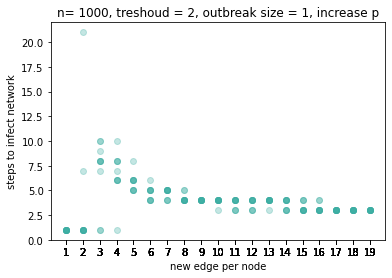

In [12]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['new_edge_num'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("new edge per node")
plt.ylabel("steps to infect network")
plt.title("n= 1000, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

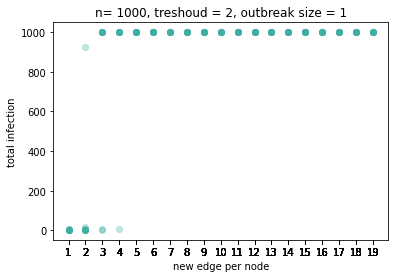

In [13]:
x = run_data['new_edge_num'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("new edge per node")
plt.ylabel("total infection")
plt.title("n= 1000, treshoud = 2, outbreak size = 1")
plt.xticks(x)
plt.show()